In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [24]:
def System(r, t):
    x, y = r
    dx = 2*x - y
    dy = x + 2*y
    return np.array([dx, dy])

def IntegratorAdams(f, r0, t):
    n = len(t)
    x = np.zeros(n)
    vx = np.zeros(n)

    x[0] = r0[0]
    vx[0] = r0[1]

    for i in range(1, n):
        R = np.array([x[i-1], vx[i-1]])
        K1 = f(R, t[i-1])
        K2 = f(R + 0.5*t[i-1]*K1, t[i-1] + 0.5*t[i-1])
        K3 = f(R + 0.5*t[i-1]*K2, t[i-1] + 0.5*t[i-1])
        K4 = f(R + t[i-1]*K3, t[i-1] + t[i-1])

        x[i] = x[i-1] + (t[i-1]/6)*(K1[0] + 2*K2[0] + 2*K3[0] + K4[0])
        vx[i] = vx[i-1] + (t[i-1]/6)*(K1[1] + 2*K2[1] + 2*K3[1] + K4[1])

    return x, vx


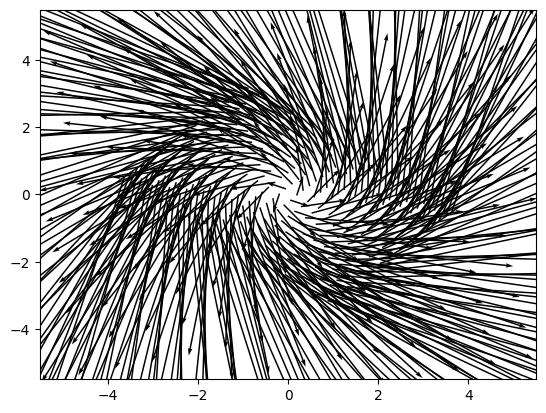

el punto crítico como se puede ver es (0,0)


In [25]:

x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

t = np.linspace(0, 10, 100)
r0 = [0.0, 0.0]  # Condiciones iniciales en el origen

fig = plt.figure()
ax = fig.add_subplot()
U, V = System([X, Y], t)
ax.quiver(X, Y, U, V, scale=20, pivot='mid')

plt.show()

print('el punto crítico como se puede ver es (0,0)')
